# EI2001: Ciencia de Datos en Astronomía

**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

## Minitarea 2: Uso de NumPy y matplotlib

**Objetivos:**

1. Poner en práctica el uso de librerías en python (específicamente NumPy y matplotlib)
2. Familiarizarse con el concepto de ndarray
3. Realizar gráficos personalizados


**Instrucciones:**

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
4. Abrir [Google Colab](https://colab.research.google.com) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
5. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
6. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
7. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.



## 1. Cargar datos

Para esta minitarea trabajaremos con la fotometría de algunas estrellas. El objetivo final de esta actividad es obtener un gráfico llamado **Diagrama de Color-Magnitud (CMD)**, este es una variante del [Diagrama de Hertzsprung Russell](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) (o diagrama HR) cuyo objetivo es ver la distribución en Brillo y Color (Luminosidad y Temperatura para el diagrama HR) de las estrellas de una población. Con este se puede reconocer las distintas etapas evolutivas en las que se encuentran las estrellas, sus edades y metalicidades. 


Comienza por cargar los datos de una población sintética. En el repositorio se encuentra el archivo de texto llamado **`phot.dat`** que contiene:

1. Fotometría en las bandas B, V, R, I (magnitud aparente)
2. Temperatura ($log_{10}(T_{eff} / K)$)
3. Masa [$M_{\odot}$]
4. Distancia [kpc] 


* Carga los datos a formato `ndarray` en la variable `datos` e inspecciona su forma y tamaño, como tambien las diferentes columnas.

In [4]:
import numpy as np

# Carga los datos a un ndarray

archivo = 'https://raw.githubusercontent.com/astrodatos/minitarea2/master/phot.dat'
datos = np.loadtxt(archivo)



# Inspecciona su forma y tamaño

print(datos.shape)
print(datos.size)


(5298, 7)
37086


## 2. Histogramas

El siguiente paso es inspeccionar los elementos en las diferentes columnas. Para ello crearás histogramas de algunas variables de interés. 

* Haz una figura con dos gráficos, uno al lado del otro, que contengan:

    1. Un histograma con las distribuciones de las magnitudes en las bandas B y V
    2. Un histograma con la distribución de masas

No olvides poner nombres a los ejes, titulos, leyendas, etc. Se creativo en el estilo de tu gráfico!

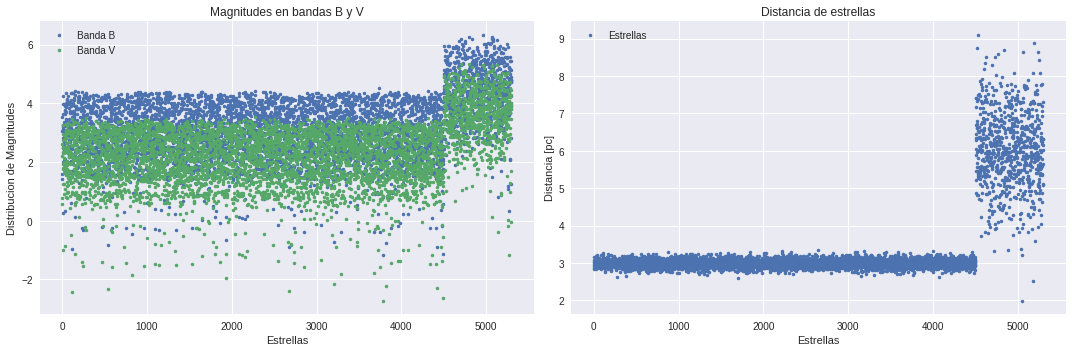

In [5]:
#Plotear histogramas de cada columna

import matplotlib.pyplot as plt
%matplotlib inline

banda_b = datos[:,0].copy()
banda_v = datos[:,1].copy()

distancia = datos[:,6]

fig, ax = plt.subplots(figsize = (15,5), ncols = 2)

ax[0].plot(banda_b,'.', label = 'Banda B')
ax[0].plot(banda_v, '.', label = 'Banda V')
ax[0].set_title('Magnitudes en bandas B y V')
ax[0].set_xlabel('Estrellas')
ax[0].set_ylabel('Distribucion de Magnitudes')
ax[0].legend(loc = 'upper left')


ax[1].plot(distancia,'.', label = 'Estrellas')
ax[1].set_title('Distancia de estrellas')
ax[1].set_xlabel('Estrellas')
ax[1].set_ylabel('Distancia [pc]')
ax[1].legend()


plt.tight_layout()

## 3. Filtrar datos

Como te habrás dado cuenta hay dos distribuciones de distancia. La mayoría de las estrellas corresponden a la población sintética creada, mientras que el resto son estrellas de fondo. Para estudiar nuestro cúmulo, primero debemos filtrar las estrellas que no pertenecen a él. 

* Haz una copia del set de datos originales en la variable `datos_filtrados` y sólo utiliza las estrellas que cumplan con un criterio basado en el histograma anterior.
* Imprime en pantalla el tamaño original del set de datos y del nuevo filtrado con el siguiente formato: _"El set original contenía X estrellas, luego de filtrar quedaron X"_


In [6]:
#Filtrar por distancia

datos_filtrados = datos[distancia < 3.5].copy()

cantidad1 = datos.size/7
cantidad2 = datos_filtrados.size/7

print('El set original contenia '+str(cantidad1)+' estrellas, luego de filtrar quedaron '+str(cantidad2))

El set original contenia 5298 estrellas, luego de filtrar quedaron 4506


## 4. Función Magnitud Absoluta

Para hacer el CMD necesitamos la magnitud absoluta de nuestras estrellas. Para esto crearemos una función que la calcule.

* Crea la función **`mag_abs(mag_ap, dist)`** de la siguiente forma:
    * **Input:** 
        1. `mag_ap`: ndarray de magnitudes aparentes
        2. `dist`: ndarray de distancias en unidades de [parsec]
    * **Output:**
        1. `mag_abs`: ndarray de magnitudes absolutas calculadas como: $M = m - 5 \log_{10} (d_{pc}) + 5 $

In [0]:
#Funcion mag_abs(mag, dist)

def mag_abs(mag_ap, dist):
    M = (mag_ap) - 5*(np.log10(dist)) + 5   
    
    return M

## 5. CMD

Ahora podemos graficar nuestro Diagrama Color Magnitud. 

* Crea los siguientes arreglos:
    1. `MV`: magnitud absoluta en la banda V
    2. `color`: resta entre las magnitudes B y V (B-V)
* Grafica MV vs color como se muestra en la siguiente [figura](https://www.astro.rug.nl/~ahelmi/galaxies_course/class_II/47tuc.gif). (**Hint: pon atención a los ejes)

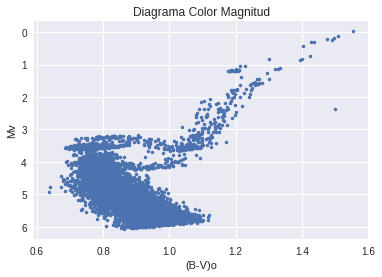

In [18]:
#Crear arrays MV y color
banda_bf = datos_filtrados[:,0].copy()
banda_vf = datos_filtrados[:,1].copy()
distanciaf = datos_filtrados[:,6].copy()

MV = mag_abs(banda_vf,distanciaf)
color = banda_bf - banda_vf

#plot cmd

plt.plot(color, MV,'.')
plt.title('Diagrama Color Magnitud')
plt.xlabel('(B-V)o')
plt.ylabel('Mv')
plt.gca().invert_yaxis()

## 6. Densidades y otros

Ahora crearemos gráficos con un poco más de información en color. 
* Haz una figura con dos gráficos, uno al lado del otro:
    1. `MV vs color`, poninedo las masas de cada estrella en color (recuerda la barra de colores)
    2. `MV vs color`, poniendo la Temperatura de cada estrella en color
* Haz una figura con un gráfico que contenga:
    1. [Histograma en 2D](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) con ejes `MV vs color` (esta figura muestra la densidad de estrellas en el espacio `MV vs color`)
    
No olvides poner **SIEMPRE** ejes a tus figuras, titulos, leyendas, etc. Elige mapas de colores donde se noten las características de los gráficos.

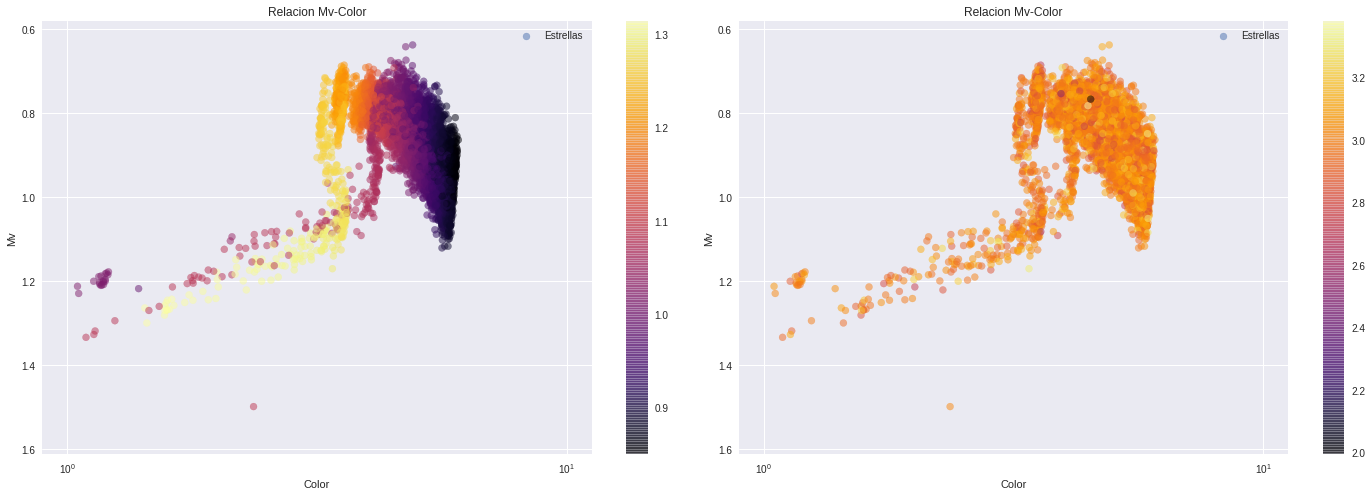

In [59]:
# plot cmd + masa / smd + temp
masa = datos_filtrados[:,5].copy()
temperatura = datos_filtrados[:,6].copy()
fig, ax = plt.subplots(figsize = (20,7), ncols = 2)

cb = ax[0].scatter(MV, color, label = 'Estrellas', c = masa, alpha = 0.5, cmap = 'inferno')

fig.colorbar(cb, ax = ax[0])
ax[0].set_xscale('log')
ax[0].invert_yaxis()
ax[0].set_ylabel('Mv')
ax[0].set_xlabel('Color')
ax[0].set_title('Relacion Mv-Color')
ax[0].legend()

cb2 = ax[1].scatter(MV, color, label = 'Estrellas', c = temperatura, alpha = 0.5,cmap = 'inferno')

fig.colorbar(cb2, ax = ax[1])
ax[1].set_xscale('log')
ax[1].invert_yaxis()
ax[1].set_ylabel('Mv')
ax[1].set_xlabel('Color')
ax[1].set_title('Relacion Mv-Color')
ax[1].legend()


fig.tight_layout()

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   5.],
        [  0.,   0.,   0.,   0.,   0.,   1.,  11.,   4.,   3.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   5.,  23.,   3.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   2.,  21.,  11.,   0.,   0.,   1.],
        [  0.,   0.,   0.,   0.,  10.,  37.,   3.,   0.,   0.,   0.],
        [ 42., 215.,  75.,  34.,  90.,  27.,   0.,   0.,   0.,   0.],
        [ 27., 515., 113.,  44.,  27.,   0.,   0.,   0.,   0.,   0.],
        [ 54., 575., 330.,  28.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  9., 253., 544., 301.,  22.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  44., 290., 478., 220.,   6.,   0.,   0.,   0.,   0.]]),
 array([-0.0313024 ,  0.57877039,  1.18884319,  1.79891598,  2.40898878,
         3.01906157,  3.62913437,  4.23920716,  4.84927996,  5.45935275,
         6.06942555]),
 array([0.63690103, 0.72877153, 0.82064203, 0.91251254, 1.00438304,
        1.09625354, 1.18812405, 1.27999455, 1.37186506, 1.463

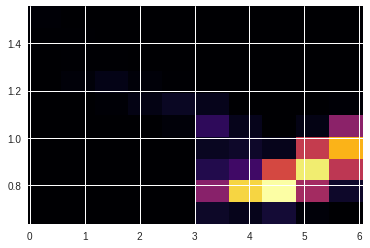

In [62]:
# plot cmd hist2D
plt.hist2d(MV,color, label='Relacion Mv-color',cmap ='inferno')

